In [138]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = [8, 8]
np.random.seed(42)

In [188]:
cine = pd.read_csv("sharedata/clientes_cine.csv").drop(['cliente', 'flag_visita_unica',
       'indicador_frecuencia_find_semana',
       'indicador_genero_mas_visto', 'incidencia_personal_dulceria',       'Numero_entradas_compradas_moda', 'indicador_promocion_nino',
       'indicador_upselling_combo', 'canal_venta_preferido',
       'indicador_cliente_prime', 'indicador_cliente_xtreme', 'total_dulceria',
       'total_boleteria', 'canti_visitas_periodo', 'tp_cliente_dulceria', 'Nro_entradas_totales_comprada'], 
    axis=1)

In [190]:
cine.columns.values

array(['edad', 'indicador_frecuencia_semana', 'TP_boleteria',
       'indicador_nro_visitas_mes', 'indicador_estreno',
       'indicador_promocion_especiales', 'PROMEDIO_ENTRADAS_COMPRADAS',
       'TP_dul_por_entrada'], dtype=object)

In [140]:
def checkOld(dfRow):
    if(dfRow < 23):
        return "Generacion Z"
    elif(dfRow>=23 and dfRow < 35):
        return "Millenials"
    elif (dfRow>=35 and dfRow < 55):
        return "BabyBoomers"
    else:
        return "Jubilados"

In [141]:
cine["edad_categoria"] = cine_norm.apply(lambda x : checkOld(x["edad"]), axis=1)

In [142]:
cine.head()

,edad,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad_categoria
0,22,0.6667,15.1667,1,0.3333,0.5000,2.00,4.21,Generacion Z
1,46,0.8000,25.7500,1,0.6000,0.5000,2.75,12.50,BabyBoomers
2,34,0.6667,45.2500,0,0.0000,0.7273,2.75,3.64,Millenials
3,24,1.0000,33.0000,1,1.0000,1.0000,2.00,33.75,Millenials
4,18,1.0000,29.0000,1,1.0000,1.0000,2.00,0.00,Generacion Z


In [143]:
cine.describe()

,edad,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.462000,0.668932,24.872816,0.246600,0.465255,0.469963,2.098055,8.335967
std,10.732953,0.352667,14.032184,0.580881,0.351142,0.357548,0.890928,10.279355
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.500000,16.210700,0.000000,0.000000,0.120000,1.625000,1.467500
50%,32.000000,0.750000,22.000000,0.000000,0.500000,0.500000,2.000000,6.540000
75%,40.000000,1.000000,30.000000,0.000000,0.714300,0.750000,2.285700,11.710000
max,97.000000,1.000000,315.000000,7.000000,1.000000,1.000000,29.000000,186.000000


In [144]:
cine.shape

(10000, 9)

In [145]:
cine[cine.columns[0:8]].corr()

,edad,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada
edad,1.000000,-0.102689,0.079562,0.002546,-0.067094,-0.073386,-0.039979,-0.032430
indicador_frecuencia_semana,-0.102689,1.000000,-0.192721,0.025979,0.061509,-0.127965,0.024622,-0.013780
TP_boleteria,0.079562,-0.192721,1.000000,-0.033166,0.059189,0.124464,0.668372,0.025365
indicador_nro_visitas_mes,0.002546,0.025979,-0.033166,1.000000,0.029231,-0.025859,-0.016023,-0.007977
indicador_estreno,-0.067094,0.061509,0.059189,0.029231,1.000000,0.069867,0.031779,-0.016324
indicador_promocion_especiales,-0.073386,-0.127965,0.124464,-0.025859,0.069867,1.000000,0.062696,-0.018401
PROMEDIO_ENTRADAS_COMPRADAS,-0.039979,0.024622,0.668372,-0.016023,0.031779,0.062696,1.000000,-0.093989
TP_dul_por_entrada,-0.032430,-0.013780,0.025365,-0.007977,-0.016324,-0.018401,-0.093989,1.000000


In [146]:
cine.head()

,edad,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad_categoria
0,22,0.6667,15.1667,1,0.3333,0.5000,2.00,4.21,Generacion Z
1,46,0.8000,25.7500,1,0.6000,0.5000,2.75,12.50,BabyBoomers
2,34,0.6667,45.2500,0,0.0000,0.7273,2.75,3.64,Millenials
3,24,1.0000,33.0000,1,1.0000,1.0000,2.00,33.75,Millenials
4,18,1.0000,29.0000,1,1.0000,1.0000,2.00,0.00,Generacion Z


In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

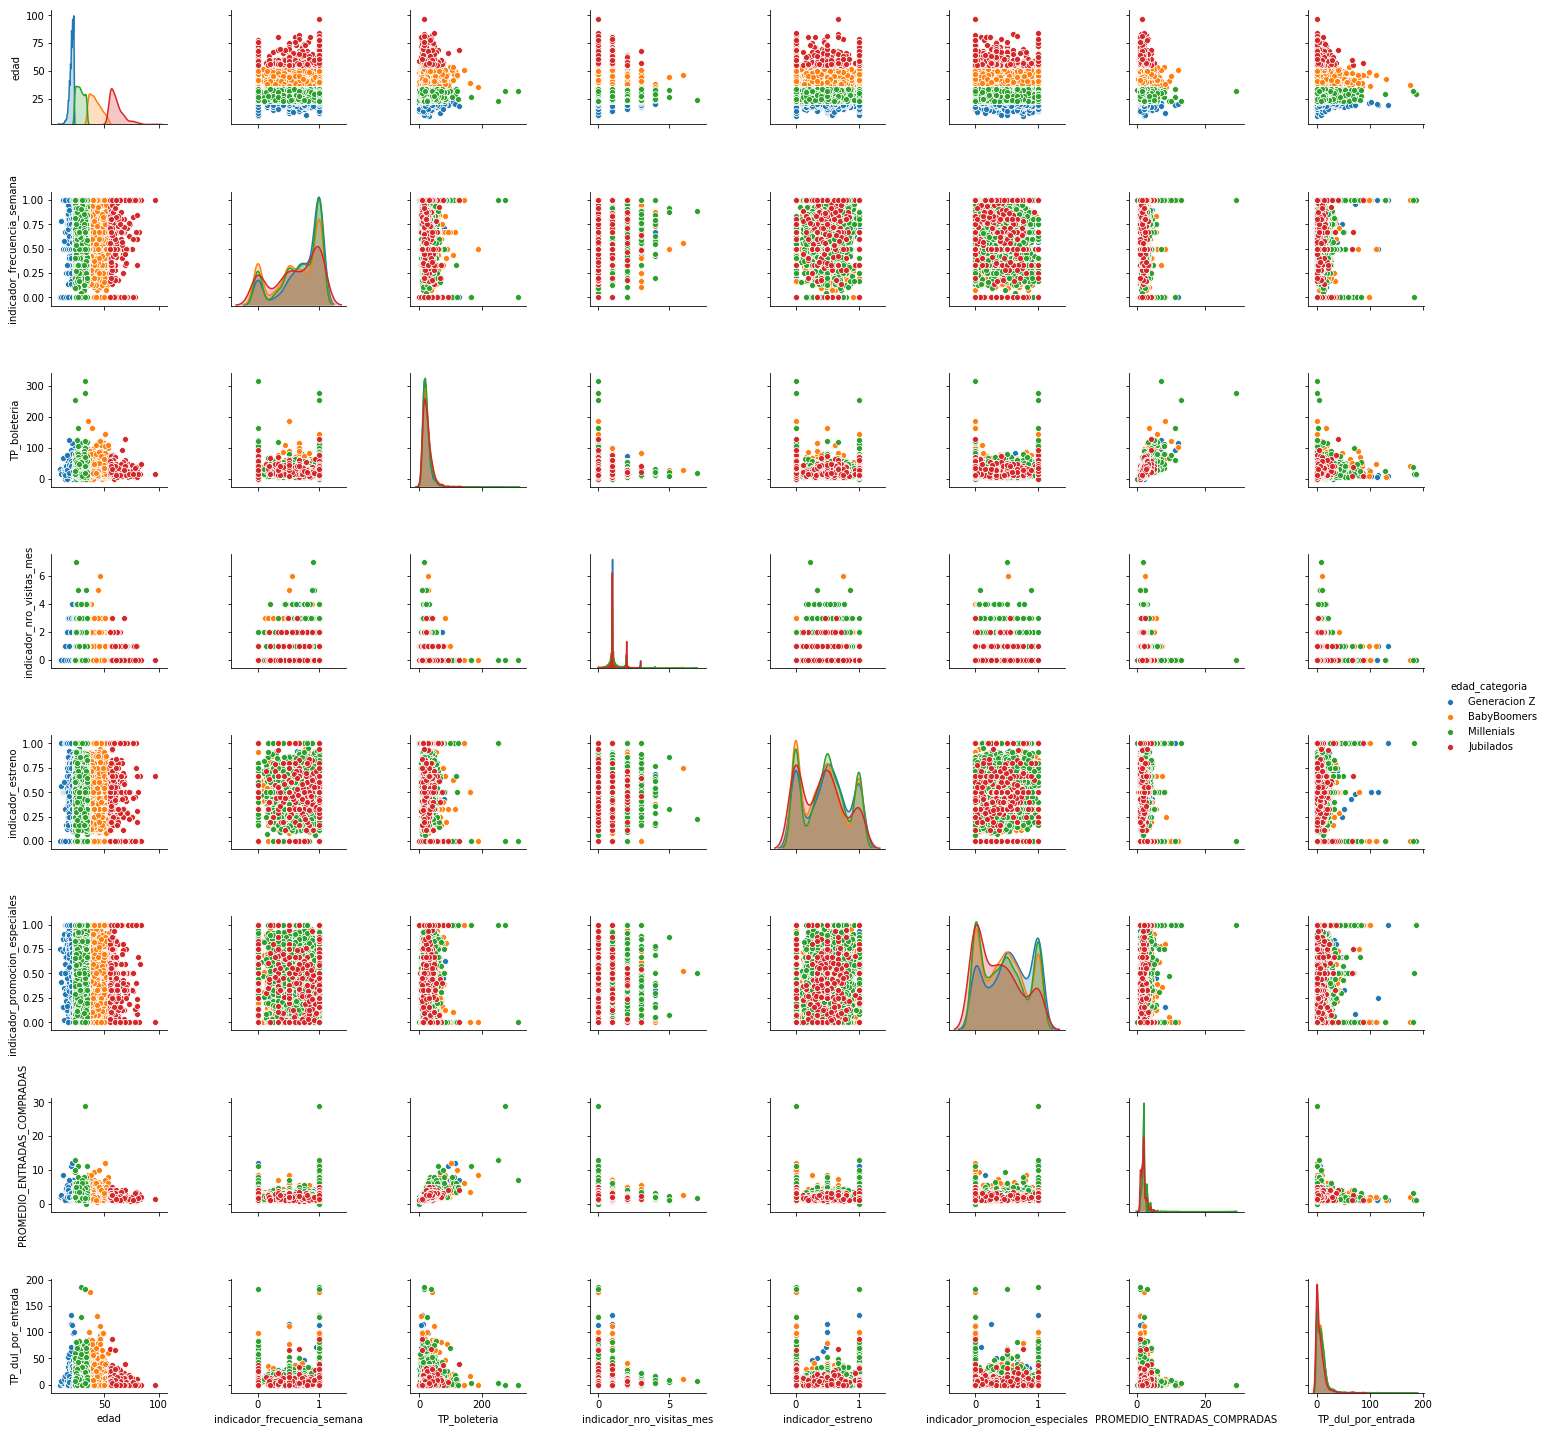

In [147]:
sns.pairplot(cine[cine.columns[0:9]], hue = "edad_categoria")

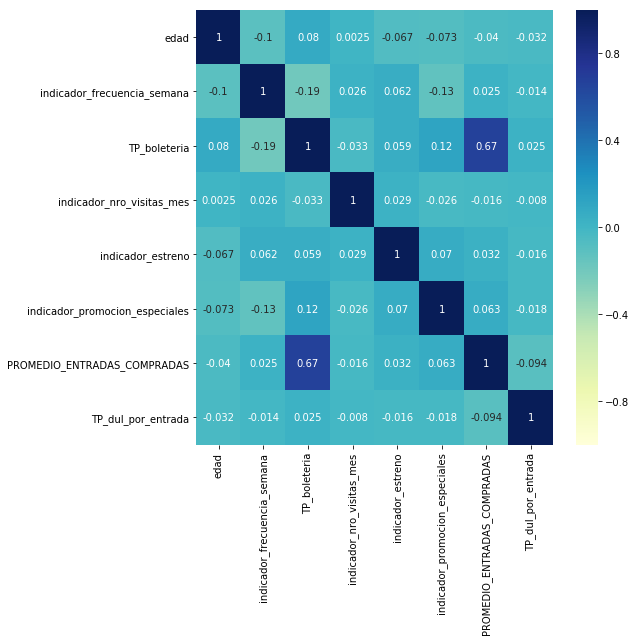

In [148]:
sns.heatmap(cine[cine.columns[:8]].corr(), vmin=-1, vmax=1, annot = True, cmap="YlGnBu")

In [149]:
cine.head()

,edad,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad_categoria
0,22,0.6667,15.1667,1,0.3333,0.5000,2.00,4.21,Generacion Z
1,46,0.8000,25.7500,1,0.6000,0.5000,2.75,12.50,BabyBoomers
2,34,0.6667,45.2500,0,0.0000,0.7273,2.75,3.64,Millenials
3,24,1.0000,33.0000,1,1.0000,1.0000,2.00,33.75,Millenials
4,18,1.0000,29.0000,1,1.0000,1.0000,2.00,0.00,Generacion Z


In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X = cine.iloc[:,1:8].values
y = cine.iloc[:,0].values


In [151]:
X

array([[ 0.6667, 15.1667,  1.    , ...,  0.5   ,  2.    ,  4.21  ],
       [ 0.8   , 25.75  ,  1.    , ...,  0.5   ,  2.75  , 12.5   ],
       [ 0.6667, 45.25  ,  0.    , ...,  0.7273,  2.75  ,  3.64  ],
       ...,
       [ 0.5385, 26.6944,  2.    , ...,  0.6944,  2.    , 12.21  ],
       [ 0.4   , 24.1071,  0.    , ...,  0.6552,  2.0714,  7.07  ],
       [ 0.    , 63.    ,  0.    , ...,  1.    ,  3.    ,  0.    ]])

In [152]:
#X_std = StandardScaler().fit_transform(X)

scaler = MinMaxScaler(feature_range=[0, 1])
X_std = scaler.fit_transform(X)     #Esto tambien se puede hacer con la normalización, ejemplo Cuadratura y procesado de datos-Copy1

In [153]:
pd.DataFrame(X_std).head()

,0,1,2,3,4,5,6
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000


In [154]:
df_x = pd.DataFrame(X_std, columns = ['indicador_frecuencia_semana',
'TP_boleteria',
'indicador_nro_visitas_mes',
'indicador_estreno',
'indicador_promocion_especiales',
'PROMEDIO_ENTRADAS_COMPRADAS',
'TP_dul_por_entrada'])



In [155]:
df_y = pd.DataFrame(y, columns= ['edad'])

In [156]:
cine_norm = pd.concat([df_x,df_y], axis = 1)

In [157]:
cine_norm.head()

,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634,22
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204,46
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570,34
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452,24
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000,18


In [158]:
cine_norm["edad_categoria"] = cine_norm.apply(lambda x : checkOld(x["edad"]), axis=1)

In [159]:
cine_categoria= cine_norm.select_dtypes([object, "category"])

In [160]:
cine_categoria.head()

,edad_categoria
0,Generacion Z
1,BabyBoomers
2,Millenials
3,Millenials
4,Generacion Z


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(df_x)

cine_pca = pca.transform(df_x)

In [162]:
cine_pca

array([[ 0.01027488,  0.10599996, -0.08220675, ..., -0.02100745,
        -0.02573717,  0.01118051],
       [-0.04897685, -0.18184021, -0.03292571, ...,  0.02224642,
         0.01858636,  0.01736471],
       [ 0.15542414,  0.33489604, -0.38292807, ..., -0.0277429 ,
         0.06536949, -0.01648569],
       ...,
       [ 0.26697768, -0.13241216,  0.02532065, ...,  0.02389926,
         0.00367932, -0.00262181],
       [ 0.32626877, -0.0466261 ,  0.12701723, ..., -0.00667073,
        -0.01232618,  0.00461241],
       [ 0.79154859,  0.55483865, -0.12302655, ..., -0.04892416,
         0.10100466, -0.02956238]])

In [163]:
pca.explained_variance_ratio_

array([0.36708515, 0.33424804, 0.26585783, 0.0176994 , 0.00788647,
       0.00625736, 0.00096574])

In [164]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36708515, 0.70133319, 0.96719103, 0.98489043, 0.99277689,
       0.99903426, 1.        ])

In [165]:
pd.DataFrame(pca.components_).head(10)

,0,1,2,3,4,5,6
0,-0.640358,0.025180,-0.007325,0.094600,0.761771,0.002893,-0.000958
1,-0.436373,0.000042,-0.007044,-0.861362,-0.259902,-0.004586,0.003830
2,-0.631603,0.011793,0.004136,0.498972,-0.593235,-0.003868,0.002280
3,-0.005677,-0.022270,0.999597,-0.007250,0.006503,-0.009994,-0.009138
4,0.002507,-0.005887,0.008233,0.002407,0.003623,-0.075898,0.997052
5,0.018827,0.854758,0.024737,-0.008308,-0.013062,0.515978,0.044141
6,-0.014268,-0.517769,-0.002513,0.002465,0.001629,0.853148,0.061932


In [166]:
df_x.head(10)

,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000
5,0.0000,0.095238,0.000000,1.0000,0.0000,0.068966,0.000000
6,0.6667,0.098942,0.000000,1.0000,1.0000,0.080459,0.040323
7,0.0000,0.120635,0.000000,1.0000,1.0000,0.137931,0.085376
8,0.7778,0.050491,0.571429,0.7667,0.0513,0.064038,0.031022
9,0.4000,0.062897,0.000000,0.8000,0.6923,0.056034,0.038656


Text(0.5, 1.0, 'Varianza explicada')

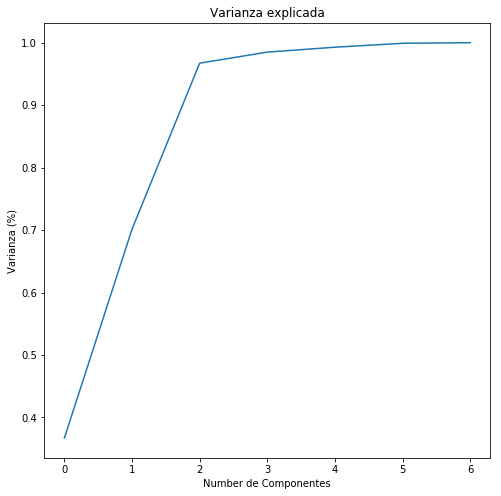

In [167]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number de Componentes')
plt.ylabel('Varianza (%)') #for each component
plt.title('Varianza explicada')

In [168]:
cine_norm.head()

,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad,edad_categoria
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634,22,Generacion Z
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204,46,BabyBoomers
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570,34,Millenials
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452,24,Millenials
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000,18,Generacion Z


In [169]:
cine_df = pd.get_dummies(cine_norm['edad_categoria'], drop_first=True)

In [91]:
cine_df.head()

,Generacion Z,Jubilados,Millenials
0,1,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,1,0,0


In [170]:
cine_k = pd.concat([cine_norm,cine_df],axis=1)

In [171]:
cine_k.head()

,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,edad,edad_categoria,Generacion Z,Jubilados,Millenials
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634,22,Generacion Z,1,0,0
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204,46,BabyBoomers,0,0,0
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570,34,Millenials,0,0,1
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452,24,Millenials,0,0,1
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000,18,Generacion Z,1,0,0


In [172]:
cine_k = cine_k.drop(['edad','edad_categoria'],axis = 1)

In [173]:
cine_k.head()

,indicador_frecuencia_semana,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,indicador_promocion_especiales,PROMEDIO_ENTRADAS_COMPRADAS,TP_dul_por_entrada,Generacion Z,Jubilados,Millenials
0,0.6667,0.048148,0.142857,0.3333,0.5000,0.068966,0.022634,1,0,0
1,0.8000,0.081746,0.142857,0.6000,0.5000,0.094828,0.067204,0,0,0
2,0.6667,0.143651,0.000000,0.0000,0.7273,0.094828,0.019570,0,0,1
3,1.0000,0.104762,0.142857,1.0000,1.0000,0.068966,0.181452,0,0,1
4,1.0000,0.092063,0.142857,1.0000,1.0000,0.068966,0.000000,1,0,0


In [174]:
from sklearn.cluster import KMeans

In [175]:
estimador_kmedias = KMeans(random_state=42, n_clusters=4)   #se da un centroida aleaotrio, y se da un numeor de cluster aleatorios

estimador_kmedias.fit(cine_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [176]:
clusters = estimador_kmedias.labels_
clusters

array([1, 0, 3, ..., 3, 3, 0], dtype=int32)

In [177]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 6.25620040e-01,  8.30296434e-02,  3.57937096e-02,
         4.39149790e-01,  4.52525031e-01,  7.16393744e-02,
         4.34671640e-02,  7.77156117e-16,  1.05263158e-01,
         3.63598041e-14],
       [ 7.35831874e-01,  7.38652599e-02,  3.50733258e-02,
         4.91880617e-01,  5.49109045e-01,  7.36272322e-02,
         4.40129989e-02,  1.00000000e+00, -1.87350135e-16,
        -8.43769499e-15],
       [ 7.74842897e-01,  7.15861075e-02,  3.76544984e-02,
         4.67750744e-01,  1.80416499e-01,  7.09052827e-02,
         4.58511932e-02,  4.44089210e-15,  2.62290190e-15,
         1.00000000e+00],
       [ 5.81658651e-01,  8.32802154e-02,  3.13253012e-02,
         4.95308482e-01,  7.97599470e-01,  7.45929439e-02,
         4.67510040e-02,  3.63598041e-15,  1.77635684e-15,
         1.00000000e+00]])

In [178]:
pd.DataFrame(centroides)

,0,1,2,3,4,5,6,7,8,9
0,0.625620,0.083030,0.035794,0.439150,0.452525,0.071639,0.043467,7.771561e-16,1.052632e-01,3.635980e-14
1,0.735832,0.073865,0.035073,0.491881,0.549109,0.073627,0.044013,1.000000e+00,-1.873501e-16,-8.437695e-15
2,0.774843,0.071586,0.037654,0.467751,0.180416,0.070905,0.045851,4.440892e-15,2.622902e-15,1.000000e+00
3,0.581659,0.083280,0.031325,0.495308,0.797599,0.074593,0.046751,3.635980e-15,1.776357e-15,1.000000e+00


In [179]:
centroides.shape

(4, 10)

In [180]:
estimador_kmedias.inertia_

3760.0661623056153

In [181]:
estimador_kmedias.n_iter_

11

In [182]:
from sklearn.metrics import euclidean_distances

In [183]:
distancias_centroides = euclidean_distances(centroides)
distancias_centroides

array([[0.        , 1.01755823, 1.05278179, 1.06549643],
       [1.01755823, 0.        , 1.46221098, 1.44417442],
       [1.05278179, 1.46221098, 0.        , 0.64744546],
       [1.06549643, 1.44417442, 0.64744546, 0.        ]])

In [184]:
pd.DataFrame(distancias_centroides)

,0,1,2,3
0,0.000000,1.017558,1.052782,1.065496
1,1.017558,0.000000,1.462211,1.444174
2,1.052782,1.462211,0.000000,0.647445
3,1.065496,1.444174,0.647445,0.000000


In [185]:
list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1)))

[(3, 1.065496428850528),
 (2, 1.4622109797634049),
 (1, 1.4622109797634049),
 (1, 1.44417441552373)]

In [186]:
def resumen_cluster(cluster_id):
    cluster = cine[clusters==cluster_id]
    resumen_cluster = cluster[cine_categoria.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [187]:
comparar_clusters(0,1,2,3)

cluster_id,0,1,2,3
PROMEDIO_ENTRADAS_COMPRADAS,2.07754,2.13519,2.05621,2.1633
TP_boleteria,26.1543,23.2676,22.5491,26.2357
TP_dul_por_entrada,8.08489,8.18642,8.52584,8.69874
edad,44.1018,19.9971,28.208,28.0419
edad_categoria,BabyBoomers,Generacion Z,Millenials,Millenials
indicador_estreno,0.43915,0.491881,0.467859,0.495192
indicador_frecuencia_semana,0.62562,0.735832,0.774849,0.581558
indicador_nro_visitas_mes,0.250556,0.245513,0.263475,0.219383
indicador_promocion_especiales,0.452525,0.549109,0.18055,0.797737
